### Predicting Change in NIFTY by analysing sentiments from News Headlines (Linear Regression)

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
np.random.seed(11)

In [63]:
sentiment_df = pd.read_csv("sentiment_nifty_data.csv", parse_dates=["date"])
sentiment_df.head()

,date,sentimentScore,niftyIndexChange
0,2020-06-30,-0.192553,-10.3
1,2020-06-29,-0.216193,-70.6
2,2020-06-26,-0.285570,94.1
3,2020-06-25,-0.190616,-16.4
4,2020-06-24,-0.257079,-165.7


In [64]:
sentiment_df.dtypes

date                datetime64[ns]
sentimentScore             float64
niftyIndexChange           float64
dtype: object

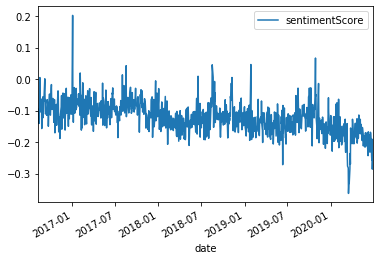

In [65]:
sentiment_df.plot(x="date", y="sentimentScore")

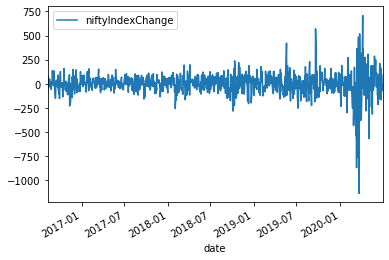

In [66]:
sentiment_df.plot(x="date", y="niftyIndexChange")

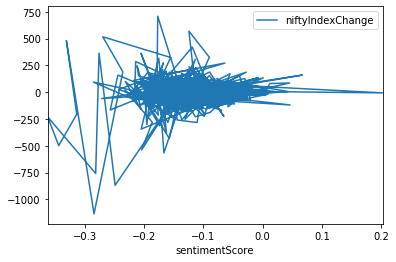

In [67]:
sentiment_df.plot(x="sentimentScore", y="niftyIndexChange")

In [68]:
# X = sentiment_df.drop("niftyIndexChange", axis=1)
X = sentiment_df["sentimentScore"].values.reshape(-1,1)
y = sentiment_df["niftyIndexChange"].values.reshape(-1,1)


#### Train Test Split and Model fit 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [70]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[34.11828455]
[[281.29166437]]


In [72]:
y_pred = regressor.predict(X_test)


In [73]:
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

,Actual,Predicted
0,62.70,6.043675
1,-43.80,-19.900015
2,28.45,-8.338455
3,31.60,5.568790
4,-34.35,-16.843326
...,...,...
187,37.55,37.957538
188,-94.90,-6.018281
189,124.95,-10.585498
190,-98.30,3.244773


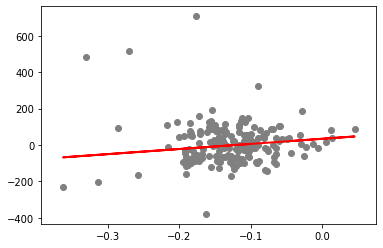

In [74]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Evaluation


In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 73.22409631907892
Mean Squared Error: 12780.63502388878
Root Mean Squared Error: 113.05147068432494
